In [508]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm.notebook import tqdm
import random
from scipy.optimize import curve_fit
Z = 16

In [509]:
def read_txt(fname):
    f = open(fname)
    fl = f.readlines()
    f.close()
    data = []
    for line in fl:
        if "#" not in line and "@" not in line and line != '\n':
            data.append(line.split())
    data = np.array(data, dtype='float')

    return data

In [510]:
class Event:
    def __init__(self, nano, c_type, stage, dist, resid, tini, tfin, duration):
        self.nano = nano
        self.type = c_type
        self.stage = stage
        self.resid = resid
        self.dist = dist
        if self.resid is not None:
            self.resid = int(self.resid)
        self.tini = tini
        self.tfin = tfin
        if self.tini is not None and self.tfin is not None:
            self.tfin += 1
            self.tini *= 0.005
            self.tfin *= 0.005
        self.duration = duration/1000

In [511]:
events = []
for n in [2, 3]:
    for m in [1, 2, 3]:
        for s in ["bound", "precat", "solv"]:
            if not (m == 3 and s == 'bound'):
                fname = f"data/NP{n}-{s}{m}.sfu"
                data = read_txt(fname)
                if n == 3 and m == 2 and s == 'bound':
                    print("A", fname)
                    evs = [Event(n, m, s, x[1], None, None, None, x[0]) for x in data]
                elif n ==3 and m == 2 and s == 'solv':
                    print("B", fname)                    
                    evs = [Event(n, m, s, x[1], None, None, None, x[0]) for x in data]                    
                else:
                    print("C", fname)
                    evs = [Event(n, m, s, x[1], x[4]-205, x[2], x[3], x[0]) for x in data]
                events += evs
print(len(events))

C data/NP2-bound1.sfu
C data/NP2-precat1.sfu
C data/NP2-solv1.sfu
C data/NP2-bound2.sfu
C data/NP2-precat2.sfu
C data/NP2-solv2.sfu
C data/NP2-precat3.sfu
C data/NP2-solv3.sfu
C data/NP3-bound1.sfu
C data/NP3-precat1.sfu
C data/NP3-solv1.sfu
A data/NP3-bound2.sfu
C data/NP3-precat2.sfu
B data/NP3-solv2.sfu
C data/NP3-precat3.sfu
C data/NP3-solv3.sfu
9222


In [512]:
mintini = min([ev.tini for ev in events if ev.tini is not None])
maxtfin = max([ev.tfin for ev in events if ev.tfin is not None])
print(mintini, maxtfin)

0.005 700.02


# Bound states

Monometallic: AuNP2 rate 1.06 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.005000000000000001
	 25 0.005
	 50 0.02
	 75 0.2475
	 95 45.56249999999995
	 100 394.75
Monometallic: AuNP3 rate 0.95 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.01
	 25 0.03
	 50 0.18
	 75 0.80375
	 95 56.3875
	 100 373.69
Bimetallic: AuNP2 rate 0.06 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.009000000000000003
	 25 0.037500000000000006
	 50 2.365
	 75 8.4
	 95 30.444500000000012
	 100 39.405
Bimetallic: AuNP3 rate 0.02 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.007000000000000001
	 25 0.185
	 50 2.13
	 75 9.774999999999999
	 95 26.833499999999994
	 100 31.03


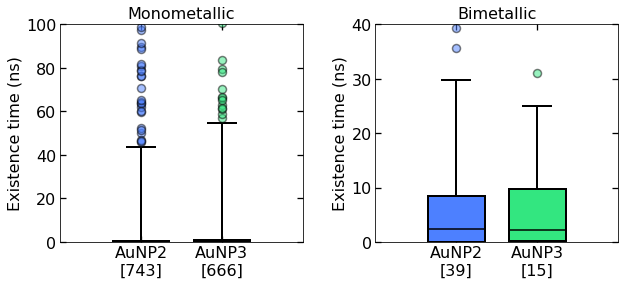

In [513]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.5)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}
titles = ['Monometallic', 'Bimetallic']
fig, axs = plt.subplots(figsize=(10,4), ncols=2, gridspec_kw={'wspace': 0.3})
xtls = []
for m, ax, title in zip([1, 2], axs, titles):
    xtl = []
    ax.set_title(title, fontsize=Z)
    for n, nano in enumerate([2,3]):
        key = 'AuNP{}'.format(nano)
        durations = [ev.duration for ev in events if ev.nano == nano and ev.type == m and ev.stage=='bound']
        durations = np.array(durations)
        durations = durations[durations>0.00]
        n_pts = len(durations)
        xtl.append(key+"\n[{}]".format(n_pts))
        print("{}: {} rate {:.2f} ns-1".format(title, key, n_pts/700))
        bpl = ax.boxplot(durations, positions=[n], whis=[5,95], widths=0.7, patch_artist=True,
                     boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
        for box in bpl['boxes']:
            box.set_facecolor(cs[key])
        for flier in bpl['fliers']:
            flier.set_markerfacecolor(cs[key])
        print("Quartile", "Value (ns)")
        for q in [0,5,10,25,50,75,95,100]:
            print("\t", q, np.quantile(durations, q/100))
        #ax.errorbar(-10, -10, ms=10, label=key+" (N = {})".format(n_pts), color=cs[key], mew=1.5, mec='k', fmt='o')
    xtls.append(xtl)

for a, ax in enumerate(axs,1):
    ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
    ax.set_xlim(-1, 2)
    ax.set_xticks([0,1])
    ax.set_xticklabels(xtls[a-1])
    ax.set_ylim(0, [100,40][a-1])
    ax.set_ylabel("Existence time (ns)", fontsize=Z)
    #ax.legend(fontsize=Z-1, handletextpad=0, ncol=1, columnspacing=0.1, borderaxespad=1, borderpad=0.4, bbox_to_anchor=(0.03,0.73,1,0.3))
plt.show()
plt.close()

- The distribution of residence times is similar between AuNP2 and AuNP3 for monometallic bound states
- There seems to be more long bimetallic states for AuNP2 than AuNP3
- Monometallic bound states live longer the bimetallic ones
- HPNP forms more bimetallic complexes with AuNP2 than AuNP3
- A binding event is slightly more likely to be bimetallic in AuNP2 (p ~ 5%) than in AuNP3 (p ~ 4%)

AuNP2
N 743
Quartile Value (nm)
	 0 1.61
	 5 1.7109999999999999
	 10 1.73
	 25 1.76
	 50 1.8
	 75 1.92
	 95 2.8789999999999996
	 100 3.26
AuNP3
N 666
Quartile Value (nm)
	 0 1.38
	 5 1.5325
	 10 1.6
	 25 1.65
	 50 1.85
	 75 1.95
	 95 2.4675000000000002
	 100 3.12
AuNP2
N 39
Quartile Value (nm)
	 0 2.29
	 5 2.4299999999999997
	 10 2.486
	 25 2.88
	 50 2.98
	 75 3.14
	 95 3.203
	 100 3.33
AuNP3
N 15
Quartile Value (nm)
	 0 2.03
	 5 2.4779999999999998
	 10 2.678
	 25 2.725
	 50 2.81
	 75 2.8499999999999996
	 95 3.0060000000000002
	 100 3.02


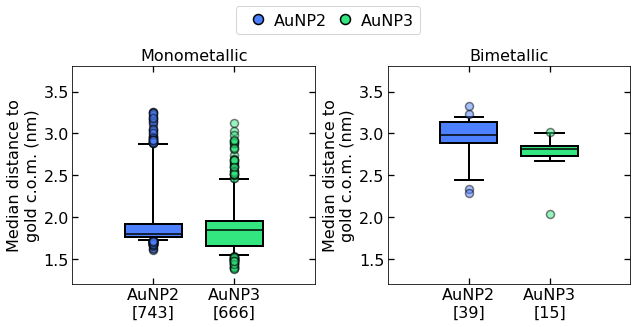

In [514]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.5)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}
titles = ['Monometallic', 'Bimetallic']
fig, axs = plt.subplots(figsize=(10,4), ncols=2, gridspec_kw={'wspace': 0.3})
xtls = []
for m, ax, title in zip([1, 2], axs, titles):
    xtl = []
    ax.set_title(title, fontsize=Z)
    for n, nano in enumerate([2,3]):
        key = 'AuNP{}'.format(nano)
        dists = [ev.dist for ev in events if ev.nano == nano and ev.type == m and ev.stage=='bound']
        dists = np.array(dists)
        n_pts = len(dists)
        xtl.append(key+"\n[{}]".format(n_pts))
        #print("{}: {} rate {:.2f} ns-1".format(title, key, n_pts/700))
        print(key)
        print("N {}".format(n_pts))
        bpl = ax.boxplot(dists, positions=[n], whis=[5,95], widths=0.7, patch_artist=True,
                     boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
        for box in bpl['boxes']:
            box.set_facecolor(cs[key])
        for flier in bpl['fliers']:
            flier.set_markerfacecolor(cs[key])
        print("Quartile", "Value (nm)")
        for q in [0,5,10,25,50,75,95,100]:
            print("\t", q, np.quantile(dists, q/100))
        ax.errorbar(-10, -10, ms=10, label=key, color=cs[key], mew=1.5, mec='k', fmt='o')
    xtls.append(xtl)

for a, ax in enumerate(axs,1):
    ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
    ax.set_xlim(-1, 2)
    ax.set_xticks([0,1])
    ax.set_xticklabels(xtls[a-1])
    ax.set_ylim(1.2, 3.8)
    ax.set_ylabel("Median distance to\ngold c.o.m. (nm)", fontsize=Z)
axs[0].legend(fontsize=Z, handletextpad=0, ncol=2, columnspacing=0.1, borderaxespad=1, borderpad=0.4, bbox_to_anchor=(0.5,1.05,1,0.3))
plt.savefig("Figures/Bound-dist.svg", format='svg', bbox_inches='tight')
plt.show()
plt.close()

In [515]:
def exponential(x, A, B):
    return A*np.exp(-B*x)

Fit ignores 0.0 ps
AuNP2 has 223 Monometallic events longer than 0.1 ns
94.0 e^(-0.058t)
AuNP3 has 383 Monometallic events longer than 0.1 ns
109.3 e^(-0.084t)
AuNP2 has 28 Bimetallic events longer than 0.1 ns
30.5 e^(-0.112t)
AuNP3 has 11 Bimetallic events longer than 0.1 ns
12.1 e^(-0.102t)


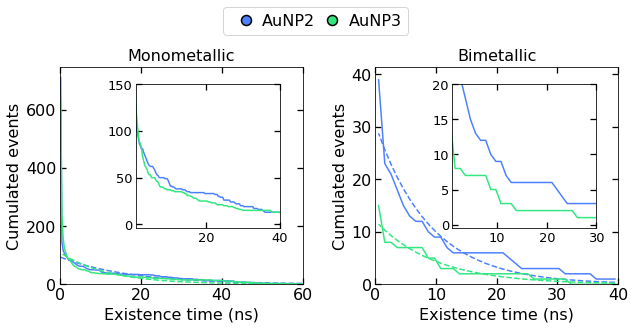

In [518]:
cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}
titles = ['Monometallic', 'Bimetallic']
fil = 0.0
print("Fit ignores {} ps".format(fil*1000))
fig, axs = plt.subplots(figsize=(10,4), ncols=2, gridspec_kw={'wspace': 0.3})
for m, ax, title in zip([1, 2], axs, titles):
    times = np.linspace(0, [60,40][m-1], [200, 40][m-1])
    ax.set_title(title, fontsize=Z)
    
    a = plt.axes([0.23+0.44*(m-1),0.32,0.2,0.5])
    a.tick_params(labelsize=Z-3, direction='in', size=6, width=1.3, which='major', right=True, top=True)        
    a.set_xlim(1, [40, 30][m-1])
    a.set_ylim([-4,-0.5][m-1],[150, 20][m-1])
    for n, nano in enumerate([2,3]):
        key = 'AuNP{}'.format(nano)
        durations = [ev.duration for ev in events if ev.nano == nano and ev.type == m and ev.stage=='bound']
        durations = np.array(durations)
        durations = durations[durations>fil]
        h, _ = np.histogram(durations, bins=times, density=False)
        cum = np.cumsum(np.flip(h))
        times_center = 0.5*(times[:-1] + times[1:])
        times_center = times_center[::-1]
        ax.plot(times_center, cum, c=cs[key])
        a.plot(times_center, cum, c=cs[key])
        fit_x = times_center[times_center>0.155]
        fit_y = cum[times_center>0.155]
        popt,_ = curve_fit(exponential, fit_x, fit_y, p0=(np.max(cum), 1))
        ax.plot(times_center, exponential(times_center,*popt), c=cs[key], ls='--')
        fil2 = 0.1
        print("{} has {} {} events longer than {} ns".format(key, len(durations[durations>fil2]), title, fil2))
        print("{:.1f} e^(-{:.3f}t)".format(*popt))
        ax.errorbar(-10, -10, ms=10, label=key, color=cs[key], mew=1.5, mec='k', fmt='o')

for a, ax in enumerate(axs,1):
    ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
    ax.set_xlim(0, [60,40][a-1])
    ax.set_ylim(0, None)
    ax.set_xlabel("Existence time (ns)", fontsize=Z)
    ax.set_ylabel("Cumulated events", fontsize=Z)
axs[0].legend(fontsize=Z, handletextpad=0, ncol=2, columnspacing=0.1, borderaxespad=1, borderpad=0.4, bbox_to_anchor=(0.5,1.05,1,0.3))
plt.savefig("Figures/Bound-time.svg", format='svg', bbox_inches='tight')
plt.show()
plt.close()

- AuNP3 has more monometallic events longer than 1 ns, but less events considering all durations. Therefore, monometallic bound states tend to be slightly longer living in AuNP3 than in AuNP2
- AuNP2 has more bimetallic events longer than 1 ns and in total. Therefore, the bimetallic bound complexes formed with AuNP2 are more stable
- The gaussian fit shows greater decay constants for bimetallic complexes in AuNP2 (-0.112) than AuNP3 (-0.206)

# Precatalytic state

Monometallic: AuNP2 rate 3.59 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.005
	 25 0.005
	 50 0.005
	 75 0.005
	 95 0.015
	 100 0.095
Monometallic: AuNP3 rate 5.01 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.005
	 25 0.005
	 50 0.005
	 75 0.01
	 95 0.019999999999999997
	 100 0.14
Bimetallic: AuNP2 rate 1.57 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.005000000000000001
	 25 0.005
	 50 0.005
	 75 0.01
	 95 0.02
	 100 0.08
Bimetallic: AuNP3 rate 0.59 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.005
	 25 0.005
	 50 0.005
	 75 0.01
	 95 0.025
	 100 0.115
Pseudo-bimetallic: AuNP2 rate 0.09 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.005
	 25 0.005
	 50 0.005
	 75 0.01
	 95 0.02
	 100 0.13
Pseudo-bimetallic: AuNP3 rate 0.03 ns-1
Quartile Value (ns)
	 0 0.005
	 5 0.005
	 10 0.005
	 25 0.005
	 50 0.005
	 75 0.005
	 95 0.005499999999999989
	 100 0.01


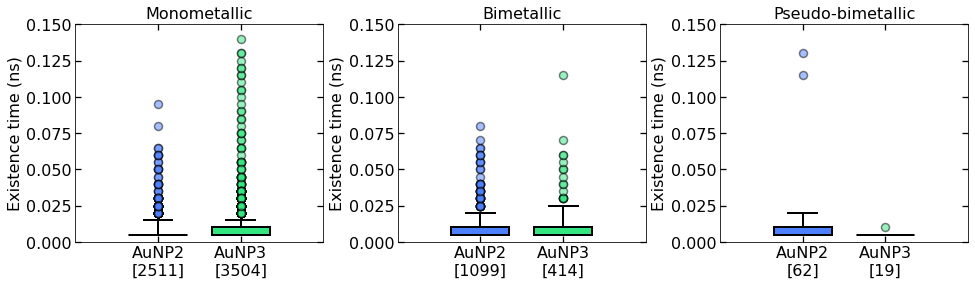

In [519]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.5)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}
titles = ['Monometallic', 'Bimetallic', 'Pseudo-bimetallic']
fig, axs = plt.subplots(figsize=(16,4), ncols=3, gridspec_kw={'wspace': 0.3})
xtls = []
for m, ax, title in zip([1, 2, 3], axs, titles):
    xtl = []
    ax.set_title(title, fontsize=Z)
    for n, nano in enumerate([2,3]):
        key = 'AuNP{}'.format(nano)
        durations = [ev.duration for ev in events if ev.nano == nano and ev.type == m and ev.stage=='precat']
        durations = np.array(durations)
        durations = durations[durations>0.00]
        n_pts = len(durations)
        xtl.append(key+"\n[{}]".format(n_pts))
        print("{}: {} rate {:.2f} ns-1".format(title, key, n_pts/700))
        bpl = ax.boxplot(durations, positions=[n], whis=[5,95], widths=0.7, patch_artist=True,
                     boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
        for box in bpl['boxes']:
            box.set_facecolor(cs[key])
        for flier in bpl['fliers']:
            flier.set_markerfacecolor(cs[key])
        print("Quartile", "Value (ns)")
        for q in [0,5,10,25,50,75,95,100]:
            print("\t", q, np.quantile(durations, q/100))
        ax.errorbar(-10, -10, ms=10, label=key, color=cs[key], mew=1.5, mec='k', fmt='o')
    xtls.append(xtl)

for a, ax in enumerate(axs,1):
    ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
    ax.set_xlim(-1, 2)
    ax.set_xticks([0,1])
    ax.set_xticklabels(xtls[a-1])
    ax.set_ylim(0, 0.15)
    ax.set_ylabel("Existence time (ns)", fontsize=Z)
    #ax.legend(fontsize=Z-1, handletextpad=0, ncol=1, columnspacing=0.1, borderaxespad=1, borderpad=0.4, bbox_to_anchor=(0.03,0.73,1,0.3))
plt.show()
plt.close()

- AuNP3 forms more monometallic precat complexes than AuNP2
- AuNP2 forms more bimetallic precat complexes than AuNP3
- For both monometallic and bimetallic precat complexes, it is slightly more likely that AuNP2 forms a pseudo-bimetallic complex

AuNP2
N 2511
Quartile Value (nm)
	 0 1.45
	 5 1.8
	 10 1.89
	 25 2.075
	 50 2.4
	 75 2.76
	 95 3.04
	 100 3.49
N solv 10
AuNP3
N 3504
Quartile Value (nm)
	 0 1.41
	 5 1.66
	 10 1.69
	 25 1.78
	 50 1.9
	 75 1.99
	 95 2.63
	 100 3.19
N solv 44
AuNP2
N 1099
Quartile Value (nm)
	 0 2.26
	 5 2.6
	 10 2.83
	 25 2.92
	 50 2.98
	 75 3.09
	 95 3.2200000000000006
	 100 3.41
N solv 20
AuNP3
N 414
Quartile Value (nm)
	 0 2.39
	 5 2.51
	 10 2.59
	 25 2.7
	 50 2.8
	 75 2.85
	 95 2.9434999999999993
	 100 3.11
N solv 12
AuNP2
N 62
Quartile Value (nm)
	 0 1.91
	 5 2.3305
	 10 2.6119999999999997
	 25 2.6850000000000005
	 50 2.815
	 75 3.0375
	 95 3.1595
	 100 3.22
N solv 59
AuNP3
N 19
Quartile Value (nm)
	 0 1.82
	 5 1.847
	 10 1.866
	 25 1.875
	 50 1.9
	 75 1.97
	 95 2.6289999999999987
	 100 3.07
N solv 5


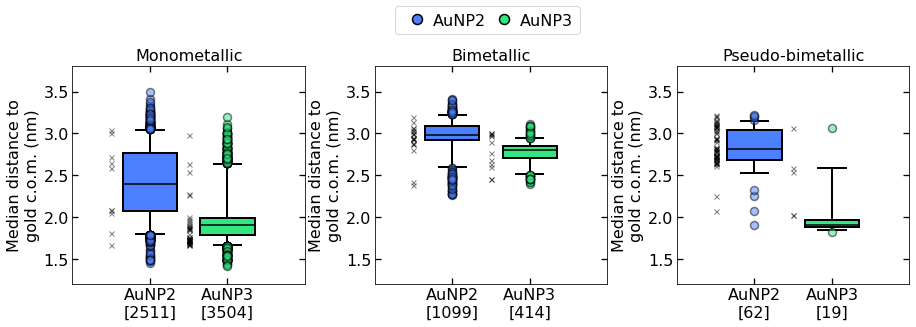

In [520]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.5)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}
titles = ['Monometallic', 'Bimetallic', 'Pseudo-bimetallic']
fig, axs = plt.subplots(figsize=(15,4), ncols=3, gridspec_kw={'wspace': 0.3})
xtls = []
for m, ax, title in zip([1, 2, 3], axs, titles):
    xtl = []
    ax.set_title(title, fontsize=Z)
    for n, nano in enumerate([2,3]):
        key = 'AuNP{}'.format(nano)
        dists = [ev.dist for ev in events if ev.nano == nano and ev.type == m and ev.stage=='precat']
        dists = np.array(dists)
        n_pts = len(dists)
        xtl.append(key+"\n[{}]".format(n_pts))
        #print("{}: {} rate {:.2f} ns-1".format(title, key, n_pts/700))
        print(key)
        print("N {}".format(n_pts))
        bpl = ax.boxplot(dists, positions=[n], whis=[5,95], widths=0.7, patch_artist=True,
                     boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
        for box in bpl['boxes']:
            box.set_facecolor(cs[key])
        for flier in bpl['fliers']:
            flier.set_markerfacecolor(cs[key])
        print("Quartile", "Value (nm)")
        for q in [0,5,10,25,50,75,95,100]:
            print("\t", q, np.quantile(dists, q/100))
        dists_solv = [ev.dist for ev in events if ev.nano == nano and ev.type == m and ev.stage=='solv']
        print("N solv", len(dists_solv))
        ax.errorbar([n-0.5]*len(dists_solv), dists_solv, fmt='x', ms=5, color='k', lw=2, zorder=100, alpha=0.5)
        ax.errorbar(-10, -10, ms=10, label=key, color=cs[key], mew=1.5, mec='k', fmt='o')
    xtls.append(xtl)
        

for a, ax in enumerate(axs,1):
    ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
    ax.set_xlim(-1, 2)
    ax.set_xticks([0,1])
    ax.set_xticklabels(xtls[a-1])
    ax.set_ylim(1.2, 3.8)
    ax.set_ylabel("Median distance to\ngold c.o.m. (nm)", fontsize=Z)
axs[0].legend(fontsize=Z, handletextpad=0, ncol=2, columnspacing=0.1, borderaxespad=1, borderpad=0.4, bbox_to_anchor=(1.25,1.05,1,0.3))
plt.savefig("Figures/Precat-dist.svg", format='svg', bbox_inches='tight')
plt.show()
plt.close()

Fit ignores 20.0 ps

AuNP2 has 70 Monometallic events longer than 0.02 ns
330.8 e^(-68.441t)
AuNP3 has 156 Monometallic events longer than 0.02 ns
436.9 e^(-46.274t)
AuNP2 has 51 Bimetallic events longer than 0.02 ns
197.4 e^(-57.498t)
AuNP3 has 25 Bimetallic events longer than 0.02 ns
83.9 e^(-53.938t)
AuNP2
AuNP3


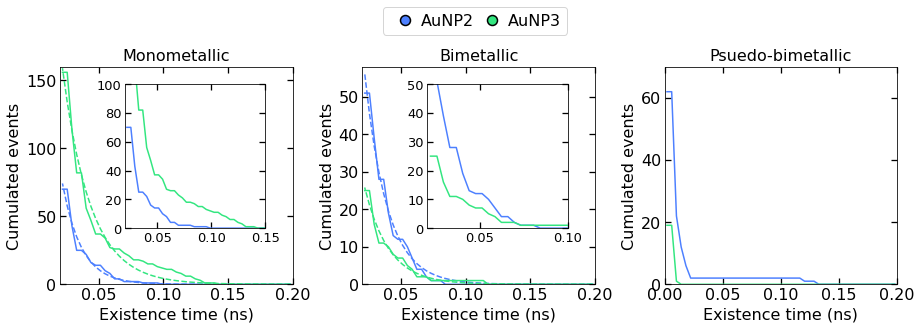

In [525]:
cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}
titles = ['Monometallic', 'Bimetallic', 'Psuedo-bimetallic']
fil = 0.02
print("Fit ignores {} ps\n".format(fil*1000))
fig, axs = plt.subplots(figsize=(15,4), ncols=3, gridspec_kw={'wspace': 0.3})
for m, ax, title in zip([1, 2, 3], axs, titles):
    ax.set_title(title, fontsize=Z)
    if m!=3:
        times = np.linspace(fil,0.2, 50)
        a = plt.axes([0.185+0.28*(m-1),0.32,0.13,0.5])
        a.tick_params(labelsize=Z-3, direction='in', size=6, width=1.3, which='major', right=True, top=True)        
        a.set_xlim(0.02, [0.15,0.1][m-1])
        a.set_ylim(0,[100, 50][m-1])
        for n, nano in enumerate([2,3]):
            key = 'AuNP{}'.format(nano)
            durations = [ev.duration for ev in events if ev.nano == nano and ev.type == m and ev.stage=='precat']
            durations = np.array(durations)
            durations = durations[durations>fil]
            h, _ = np.histogram(durations, bins=times, density=False)
            cum = np.cumsum(np.flip(h))
            times_center = 0.5*(times[:-1] + times[1:])
            times_center = times_center[::-1]
            ax.plot(times_center, cum, c=cs[key])
            a.plot(times_center, cum, c=cs[key])
            popt,_ = curve_fit(exponential, times_center, cum, p0=(np.max(cum), 1))
            ax.plot(times_center, exponential(times_center,*popt), c=cs[key], ls='--')
            #a.plot(times_center, exponential(times_center,*popt), c=cs[key], ls='--')
            fil2 = 0.02
            print("{} has {} {} events longer than {} ns".format(key, len(durations[durations>fil2]), title, fil2))
            print("{:.1f} e^(-{:.3f}t)".format(*popt))
            ax.errorbar(-10, -10, ms=10, label=key, color=cs[key], mew=1.5, mec='k', fmt='o')
    else:
        for n, nano in enumerate([2,3]):
            times = np.linspace(0,0.2, 50)
            key = 'AuNP{}'.format(nano)
            print(key)
            durations = [ev.duration for ev in events if ev.nano == nano and ev.type == m and ev.stage=='precat']
            durations = np.array(durations)
            h, _ = np.histogram(durations, bins=times, density=False)
            cum = np.cumsum(np.flip(h))
            times_center = 0.5*(times[:-1] + times[1:])
            times_center = times_center[::-1]
            ax.plot(times_center, cum, c=cs[key])

for a, ax in enumerate(axs,1):
    ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
    ax.set_xlim(fil, 0.2)
    ax.set_xlabel("Existence time (ns)", fontsize=Z)
    ax.set_ylabel("Cumulated events", fontsize=Z)
    ax.set_ylim(0,[160,58,70][a-1])
    #ax.legend(fontsize=Z-1, handletextpad=0, ncol=1, columnspacing=0.1, borderaxespad=1, borderpad=0.4, bbox_to_anchor=(0.03,0.73,1,0.3))
axs[2].set_xlim(0, 0.2)
axs[0].legend(fontsize=Z, handletextpad=0, ncol=2, columnspacing=0.1, borderaxespad=1, borderpad=0.4, bbox_to_anchor=(1.25,1.05,1,0.3))
plt.savefig("Figures/Precat-time.svg", format='svg', bbox_inches='tight')
plt.show()
plt.close()

- AuNP3 has more monometallic events longer than 0.02 ns and in total. Therefore, monometallic precat complexes formed with AuNP3 are more stable
- AuNP2 has more bimetallic events longer than 0.02 ns and in total. Therefore, the bimetallic bound complexes formed with AuNP2 are more stable

---

- If we account for all the events, the decay constant for AuNP2 and AuNP3 is basically the same for both types of complexes
- If we discard the very short events, then we find that monometallic and bimetallic precat complexes are longer for AuNP3 than AuNP2, but the difference is smaller for the bimetallic case

In [314]:
def prob_b_given_c(n, m):
    n_max = 10 * 700000/0.005 #10 analytes, 700 ns total time, 5 ps step
    evs = [ev.duration//0.005 for ev in events if ev.nano == n and ev.type == m and ev.stage == 'solv']
    n_solv = np.sum(evs, dtype='int')
    print("\t\tN = {:d}".format(n_solv))
    return n_solv/n_max

In [319]:
for m, keym in zip([1,2,3], ['Monometallic', 'Bimetallic', 'Pseudobimetallic']):
    print(keym)
    prob = {}
    for n in [2,3]:
        keyn = "AuNP{}".format(n)
        print('\t', keyn)
        prob[n] = prob_b_given_c(n=n, m=m)
        print("\t\tp = {:.2E}".format(prob[n]))
    print("\tRatio (AuNP2/AuNP3): {:.2f}\n".format(prob[2]/prob[3]))

Monometallic
	 AuNP2
		N = 11
		p = 7.86E-09
	 AuNP3
		N = 49
		p = 3.50E-08
	Ratio (AuNP2/AuNP3): 0.22

Bimetallic
	 AuNP2
		N = 22
		p = 1.57E-08
	 AuNP3
		N = 13
		p = 9.29E-09
	Ratio (AuNP2/AuNP3): 1.69

Pseudobimetallic
	 AuNP2
		N = 84
		p = 6.00E-08
	 AuNP3
		N = 5
		p = 3.57E-09
	Ratio (AuNP2/AuNP3): 16.80



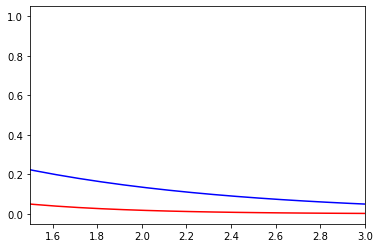

In [391]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 100)
ax.plot(x, np.exp(-1*x), c='b')
ax.plot(x, np.exp(-2*x), c='r')
ax.set_xlim(1.5,3)
plt.show()